In [1]:
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from scipy.cluster.vq import vq
import joblib
# from skimage import io
# from PIL import Image 
import matplotlib.pyplot as plt


(20, 128)


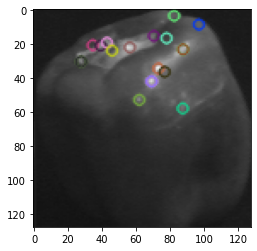

In [83]:
# Test SIFT detector
img = cv2.imread('/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj82/obj82__140.png')   #đọc ảnh
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # chuyển ảnh sang hệ gray

sift = cv2.SIFT_create(128) #khởi tạo đối tượng sift

kp, des = sift.detectAndCompute(img,None)   #Đối tượng này có phương thức detectAndCompute trả về 2 outputs kp và des, kp là một list chứa các keypoints được detect bởi SIFT, des là một numpy array chứa len(kp) vectors 128 chiều.
print(des.shape)  

img=cv2.drawKeypoints(gray,kp,img)
plt.imshow(img)

In [3]:
clf, classes_names, stdSlr, k, voc = joblib.load(
    "/home/darkknight/computer-vision/sift500_coil100_svm.pkl")

In [7]:
classes_names

['obj67',
 'obj82',
 'obj20',
 'obj48',
 'obj92',
 'obj93',
 'obj23',
 'obj80',
 'obj35',
 'obj9',
 'obj22',
 'obj7',
 'obj79',
 'obj76',
 'obj38',
 'obj78',
 'obj24',
 'obj39',
 'obj4',
 'obj88',
 'obj3',
 'obj71',
 'obj21',
 'obj14',
 'obj50',
 'obj10',
 'obj27',
 'obj30',
 'obj32',
 'obj94',
 'obj53',
 'obj11',
 'obj74',
 'obj58',
 'obj44',
 'obj97',
 'obj64',
 'obj29',
 'obj73',
 'obj69',
 'obj98',
 'obj13',
 'obj56',
 'obj61',
 'obj87',
 'obj31',
 'obj37',
 'obj86',
 'obj12',
 'obj65',
 'obj17',
 'obj45',
 'obj70',
 'obj28',
 'obj34',
 'obj40',
 'obj8',
 'obj16',
 'obj100',
 'obj99',
 'obj95',
 'obj72',
 'obj18',
 'obj89',
 'obj52',
 'obj60',
 'obj25',
 'obj2',
 'obj62',
 'obj47',
 'obj63',
 'obj68',
 'obj49',
 'obj36',
 'obj26',
 'obj83',
 'obj66',
 'obj19',
 'obj54',
 'obj90',
 'obj33',
 'obj75',
 'obj96',
 'obj51',
 'obj57',
 'obj84',
 'obj59',
 'obj81',
 'obj55',
 'obj77',
 'obj46',
 'obj85',
 'obj5',
 'obj42',
 'obj41',
 'obj6',
 'obj91',
 'obj43',
 'obj15',
 'obj1']

In [8]:
test_path = '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test'

image_paths = []
image_classes = []
class_id = 0

In [9]:
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]


for class_name in classes_names:
    dir = os.path.join(test_path, class_name)
    class_path = imglist(dir)
    image_paths += class_path
    image_classes += [class_id] * len(class_path)
    class_id += 1
des_list = []

In [12]:
image_paths

['/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__0.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__125.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__100.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__140.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__260.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__350.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__145.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__235.png',
 '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__255.png',
 '/home/darkknight/computer-vision/object-detect

In [13]:
sift = cv2.SIFT_create(128)

In [14]:
for image_path in image_paths:
    im = cv2.imread(image_path)
    # im = cv2.resize(im, (150,150))
    kpts, des = sift.detectAndCompute(im, None)
    des_list.append((image_path, des))

In [80]:
des_list[21]

('/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj82/obj82__140.png',
 array([[  0.,   0.,   1., ...,  24.,   1.,   0.],
        [ 13.,   6.,  11., ...,   0.,   1.,  13.],
        [127.,   7.,   0., ...,   6.,   0.,   0.],
        ...,
        [ 16.,   2.,   0., ...,  23.,   7.,   3.],
        [ 26.,  19.,   9., ...,   2.,   0.,   0.],
        [  9.,   1.,   0., ...,  11.,   1.,   1.]], dtype=float32))

In [16]:
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    if des_list[i][1] is not None:
        words, distance = vq(des_list[i][1], voc)
        for w in words:
            test_features[i][w] += 1
test_features = stdSlr.transform(test_features)

In [17]:
pred = clf.predict(test_features)
accuracy = accuracy_score(image_classes, pred)
report = classification_report(image_classes, pred)
print(accuracy)

0.9721428571428572


#### Demo 

In [72]:
def inference(image_paths, image_classes, classes_names, pred, index):
    img = cv2.imread(image_paths[index], cv2.IMREAD_COLOR)
    img_label = image_classes[index]
    for value in range(len(set(image_classes))):
        if img_label == list(set(image_classes))[value]:
            img_label = classes_names[value]
    img_pred = pred[index]
    for value in range(len(set(image_classes))):
        if img_pred == list(set(image_classes))[value]:
            img_pred = classes_names[value]
    #draw label and pred on img
    print("label: ", img_label)
    print("pred: ", img_pred)
    plt.imshow(img)

label:  obj82
pred:  obj82


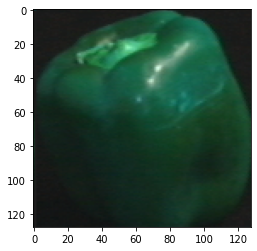

In [84]:
inference(image_paths, image_classes, classes_names, pred, 21)

/home/semendemon/anaconda3/envs/KALAPA/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


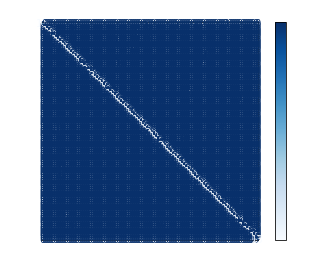

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, test_features, image_classes, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()